In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class FiveLink:
    def __init__(self, l0, l1, l2):
        self.w = l0/2
        self.l1 = l1
        self.l2 = l2
        
    def fk(self, th1s, th2s):
        th1s = th1s.reshape(1, -1)
        th2s = th2s.reshape(1, -1)
        j1 = np.concatenate([self.l1*np.cos(th1s) - self.w, 
                                              self.l1*np.sin(th1s)])
        j2 = np.concatenate([self.l1*np.cos(np.pi - th2s) + self.w, 
                                              self.l1*np.sin(np.pi - th2s)])
        mask = (j1[0] <= j2[0])
        j1 = j1[:, mask]
        j2 = j2[:, mask]
        #print(j1.shape)
        m = (j1 + j2)/2
        v = j2 - j1
        v_norm = np.linalg.norm(v, axis=0)
        on = v[[1, 0]]*np.array([[-1],[ 1]])/v_norm
        l = self.l2**2 - (v_norm/2)**2
        mask = (l >= 0)
        l = np.sqrt(l[mask])
        p = m[:, mask] + l*on[:, mask]
        return p

In [99]:
model = FiveLink(60, 100, 100)

In [100]:
th1s = np.array(range(0, 185, 5))*np.pi/180
th1s = np.repeat(th1s.reshape(1, -1), 36, axis=0).flatten()
th2s = np.array(range(0, 185, 5))*np.pi/180
th2s = np.repeat(th2s, 36)
print(th1s)
print(th2s)

[0.         0.08726646 0.17453293 ... 2.96705973 3.05432619 3.14159265]
[0.         0.         0.         ... 3.14159265 3.14159265 3.14159265]


In [101]:
p = model.fk(th1s, th2s)
p.shape

(2, 775)

In [102]:
x, y = p

In [103]:
x.shape

(775,)

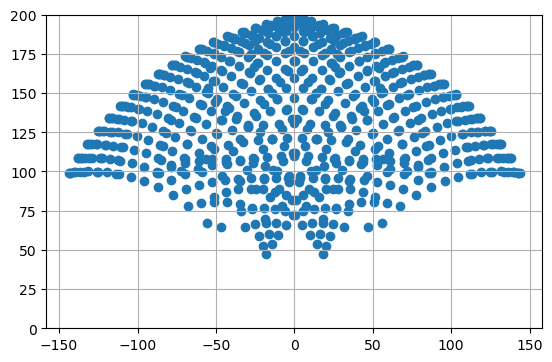

In [104]:
x, y = p
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.set_ylim(0, 200)
ax.grid()
ax.scatter(x, y)
plt.show()

In [171]:
class FourLink:
    def __init__(self, l1, l2, l3):
        self.l1 = l1
        self.l2 = l2
        self.l3 = l3
        
    def fk(self, th1s, th2s):
        th1s = th1s.reshape(1, -1)
        th2s = th2s.reshape(1, -1)
        e1 = np.concatenate([np.cos(th1s),
                                               np.sin(th1s)])
        e2 = np.concatenate([-np.cos(th2s), 
                                               np.sin(th2s)])
        j1 = self.l1*e1
        j2 = self.l2*e2
        p = self.l1*e1 - self.l3*e2
        mask = (j1[0] >= j2[0])
        p = p[:, mask]
        return p

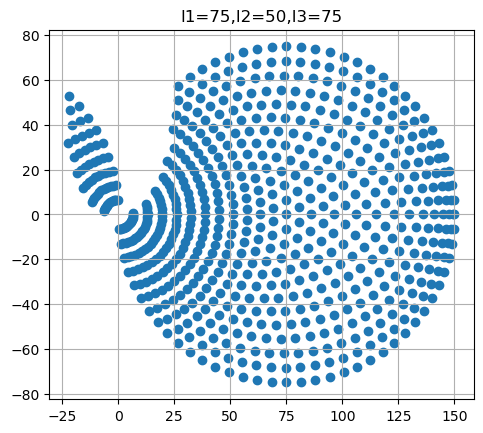

In [254]:
model2 = FourLink(75, 50, 75) #120, 80

th1s = np.array(range(0, 185, 5))*np.pi/180
th1s = np.repeat(th1s.reshape(1, -1), 36, axis=0).flatten()
th2s = np.array(range(0, 185, 5))*np.pi/180
th2s = np.repeat(th2s, 36)

ps = model2.fk(th1s, th2s)
ps.shape

xs, ys = ps
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
#ax.set_ylim(0, 200)
ax.grid()
ax.scatter(xs, ys)
ax.set_title(f'l1={model2.l1},l2={model2.l2},l3={model2.l3}')
plt.show()

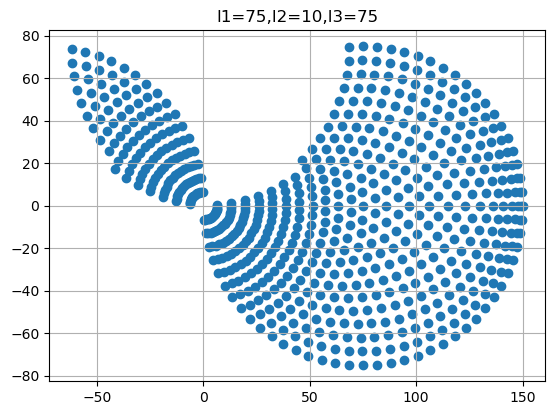

In [256]:
model3 = FourLink(75, 10, 75) #120, 80

th1s = np.array(range(0, 185, 5))*np.pi/180
th1s = np.repeat(th1s.reshape(1, -1), 36, axis=0).flatten()
th2s = np.array(range(0, 185, 5))*np.pi/180
th2s = np.repeat(th2s, 36)

ps = model3.fk(th1s, th2s)
ps.shape

xs, ys = ps
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
#ax.set_ylim(0, 200)
ax.grid()
ax.scatter(xs, ys)
ax.set_title(f'l1={model3.l1},l2={model3.l2},l3={model3.l3}')
plt.show()

In [231]:
np.linalg.norm(a, axis=0)

NameError: name 'a' is not defined

In [6]:
np.linalg.norm(a, axis=1)

array([3.74165739, 8.77496439])

In [88]:
a = np.array([[1,2,3]])
b = np.array([[3,4,5]])

In [89]:
c = np.concatenate([a, b], axis=0)

In [94]:
np.array([[1],[ -1]])*c

array([[ 1,  2,  3],
       [-3, -4, -5]])

In [ ]:
class MyLink:
    def __init__(self, l1, l2, l3):
        self.l1 = l1
        self.l2 = l2
        self.l3 = l3
        
    def fk(self, th1s, th2s):
        th1s = th1s.reshape(1, -1)
        th2s = th2s.reshape(1, -1)
        e1 = np.concatenate([np.cos(th1s),
                                               np.sin(th1s)])
        e2 = np.concatenate([-np.cos(th2s), 
                                               np.sin(th2s)])
        j1 = self.l1*e1
        j2 = self.l2*e2
        p = self.l1*e1 - self.l3*e2
        mask = (j1[0] >= j2[0])
        p = p[:, mask]
        return p
    
    def ik(self, p_ref, err=1e-3):
        th1= 0
        th2 = np.pi/2
        while np.linalg.norm(p_ref-p, ord=2) > err:
            J_inv = np.array([[-self.l3*np.cos(th), ],[]])
        